**Classification**


**Breast Cancer dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Data.csv')

In [3]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
dataset.shape

(683, 11)

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample code number,683.0,1.076720e+06,620644.047655,63375.0,877617.0,1171795.0,1238705.0,13454352.0
Clump Thickness,683.0,4.442167e+00,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805e+00,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227e+00,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161e+00,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261e+00,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095e+00,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693e+00,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221e+00,1.732674,1.0,1.0,1.0,1.0,10.0


In [7]:
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: False


                             Sample code number  ...     Class
Sample code number                     1.000000  ... -0.084701
Clump Thickness                       -0.056350  ...  0.714790
Uniformity of Cell Size               -0.041396  ...  0.820801
Uniformity of Cell Shape              -0.042221  ...  0.821891
Marginal Adhesion                     -0.069630  ...  0.706294
Single Epithelial Cell Size           -0.048644  ...  0.690958
Bare Nuclei                           -0.099248  ...  0.822696
Bland Chromatin                       -0.061966  ...  0.758228
Normal Nucleoli                       -0.050699  ...  0.718677
Mitoses                               -0.037972  ...  0.423448
Class                                 -0.084701  ...  1.000000

[11 rows x 11 columns]


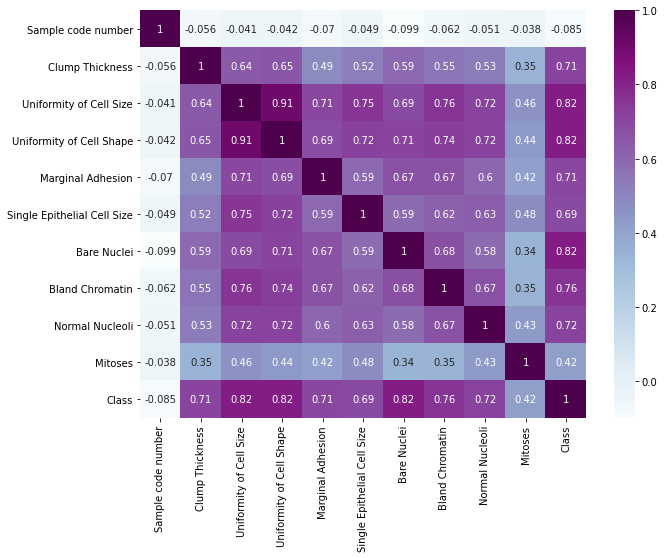

In [8]:
corr_var=dataset.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

In [9]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
#print(X)
#print(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (546, 10)
y_train: (546,)
X_test: (137, 10)
y_test: (137,)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Decision Tree**

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [13]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
dt=accuracy_score(y_test,y_pred)

[[85  2]
 [ 2 48]]


**K Nearest Neighbors**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
y_pred1 = classifier1.predict(X_test)
#print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

In [17]:
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
knn=accuracy_score(y_test,y_pred1)

[[83  4]
 [ 2 48]]


**Support Vector Machine**

In [18]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear',random_state =0)
classifier2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
y_pred2 = classifier2.predict(X_test)
#print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

In [20]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
svma=accuracy_score(y_test,y_pred2)

[[83  4]
 [ 2 48]]


**Kernel SVM - RBF**

In [21]:
classifier3 = SVC(kernel='rbf',random_state=0)
classifier3.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [22]:
y_pred3 = classifier3.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [23]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
svmrbf=accuracy_score(y_test,y_pred3)

[[82  5]
 [ 1 49]]


**Kernel SVM - Poly**

In [24]:
classifier4 = SVC(kernel='poly',degree=3,random_state=0)
classifier4.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [25]:
y_pred4 = classifier4.predict(X_test)
#print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

In [26]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
svmpoly=accuracy_score(y_test,y_pred4)

[[86  1]
 [ 7 43]]


**Kernel SVM - Sigmoid**

In [27]:
classifier5 = SVC(kernel='sigmoid',random_state=0)
classifier5.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
y_pred5 = classifier5.predict(X_test)
#print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.reshape(len(y_test),1)),1))

In [29]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
svmsig=accuracy_score(y_test,y_pred5)

[[82  5]
 [ 2 48]]


**Naive Bayes**

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier6 = GaussianNB()
classifier6.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
y_pred6 = classifier6.predict(X_test)
#print(np.concatenate((y_pred6.reshape(len(y_pred6),1), y_test.reshape(len(y_test),1)),1))

In [32]:
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)
nb=accuracy_score(y_test,y_pred6)

[[80  7]
 [ 0 50]]


**Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
classifier7 = LogisticRegression()
classifier7.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred7 = classifier7.predict(X_test)
#print(np.concatenate((y_pred7.reshape(len(y_pred7),1), y_test.reshape(len(y_test),1)),1))

In [35]:
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)
logreg=accuracy_score(y_test,y_pred7)

[[84  3]
 [ 3 47]]


**Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier8 = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier8.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
y_pred8 = classifier8.predict(X_test)
#print(np.concatenate((y_pred8.reshape(len(y_pred8),1), y_test.reshape(len(y_test),1)),1))

In [38]:
cm8 = confusion_matrix(y_test, y_pred8)
print(cm8)
rf=accuracy_score(y_test,y_pred8)

[[84  3]
 [ 3 47]]


In [39]:
print('Accuracy for Decision Tree model = ', dt*100)
print('Accuracy for K Nearest Neighbor = ', knn*100)
print('Accuracy for Support Vector Machine = ',svma*100)
print('Accuracy for Kernel SVM - RBF =',svmrbf*100)
print('Accuracy for Kernel SVM - poly =',svmpoly*100)
print('Accuracy for Kernel SVM - sigmoid =',svmsig*100)
print('Accuracy for Naive Bayes=',nb*100)
print ('Accuracy for Logistic Regression =', logreg*100)
print('Accuracy for Random Forest =',rf*100)

Accuracy for Decision Tree model =  97.08029197080292
Accuracy for K Nearest Neighbor =  95.62043795620438
Accuracy for Support Vector Machine =  95.62043795620438
Accuracy for Kernel SVM - RBF = 95.62043795620438
Accuracy for Kernel SVM - poly = 94.16058394160584
Accuracy for Kernel SVM - sigmoid = 94.8905109489051
Accuracy for Naive Bayes= 94.8905109489051
Accuracy for Logistic Regression = 95.62043795620438
Accuracy for Random Forest = 95.62043795620438


Hope the procedure will help you out in solving classification problem

**Premanand S**